In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("testset.csv")

In [3]:
df.head(10)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,19961101-17:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,19961101-18:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,19961101-19:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,19961101-20:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,19961101-21:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [4]:
df.shape

(100990, 20)

In [5]:
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [6]:
df.columns = map(lambda x: x.strip(), df.columns)

In [7]:
df.isnull().sum(axis=1).value_counts()

4     53076
3     27988
6     16326
5      2250
2       665
7       545
8        75
9        64
10        1
dtype: int64

In [8]:
df.isnull().sum()

datetime_utc         0
_conds              72
_dewptm            621
_fog                 0
_hail                0
_heatindexm      71835
_hum               757
_precipm        100990
_pressurem         232
_rain                0
_snow                0
_tempm             673
_thunder             0
_tornado             0
_vism             4428
_wdird           14755
_wdire           14755
_wgustm          99918
_windchillm     100411
_wspdm            2358
dtype: int64

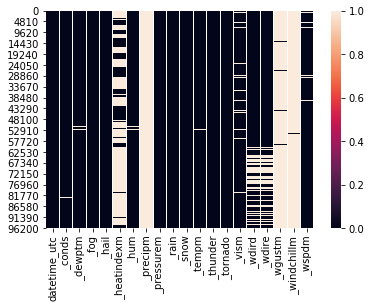

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.drop(df.columns[df.isnull().sum()>10000],axis=1,inplace=True)

In [11]:
df._conds.value_counts()

Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Thunderstorm                  64
Light Fog                           64
Heavy Rain               

Text(0, 0.5, 'Percent')

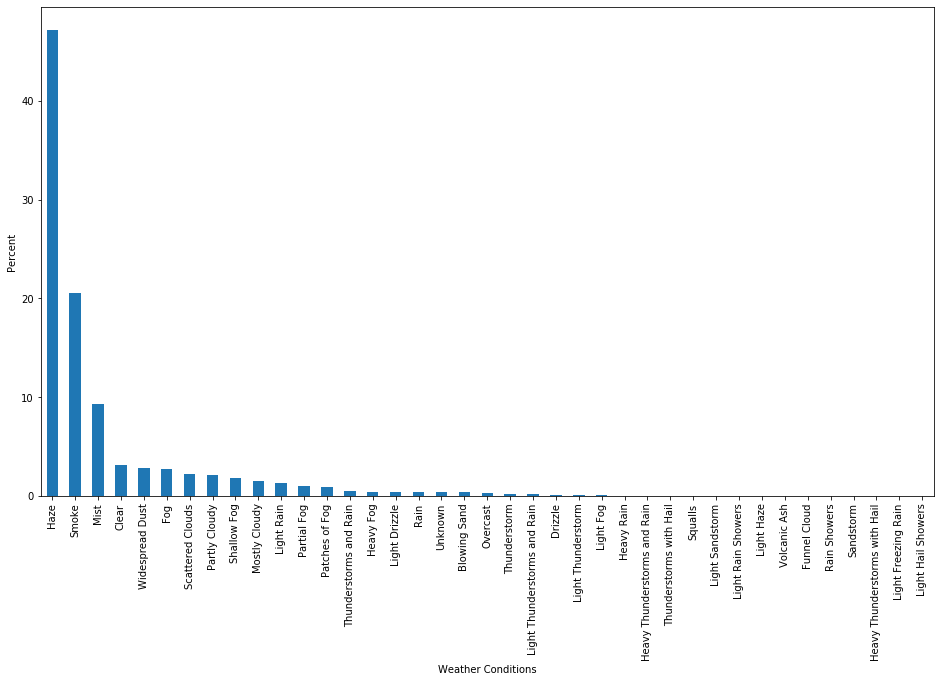

In [12]:
weather_condition = (df._conds.value_counts()/(df._conds.value_counts().sum()))*100
weather_condition.plot.bar(figsize=(16,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')

In [13]:
df.drop(['_vism','_wspdm'],inplace=True,axis=1)

In [14]:
df.describe()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado
count,100369.000000,100990.000000,100990.000000,100233.000000,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000
mean,15.741205,0.069690,0.000129,57.909481,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002
std,7.058587,0.254625,0.011345,23.807771,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000
25%,10.000000,0.000000,0.000000,39.000000,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000
50%,15.000000,0.000000,0.000000,59.000000,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000
75%,22.000000,0.000000,0.000000,78.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000
max,75.000000,1.000000,1.000000,243.000000,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000


# Data Preprocessing

In [15]:
#It is showing maximum temprature as 90 and max humidity as 243 which is non-realistic, so is an outlier. 
#We need to treat these outliers.
df = df[df._tempm < 50]
df = df[df._hum <= 100]
df = df[df._dewptm>=-5]

In [16]:
df._dewptm.unique()

array([ 9., 10., 11., 12., 13.,  8.,  7., 14.,  5.,  6.,  4.,  2.,  1.,
        3., -1.,  0., -4., -2., -3., -5., 15., 16., 27., 17., 18., 19.,
       20., 21., 24., 22., 23., 28., 26., 25., 29., 30., 31., 32., 33.,
       35.])

In [17]:
df._dewptm.fillna(df._dewptm.mean(),inplace=True)

In [18]:
df._hum.unique()

array([ 27.,  32.,  44.,  41.,  47.,  56.,  60.,  68.,  64.,  52.,  46.,
        39.,  29.,  24.,  22.,  25.,  34.,  53.,  72.,  63.,  30.,  35.,
        33.,  42.,  57.,  77.,  37.,  59.,  38.,  23.,  26.,  36.,  49.,
        55.,  28.,  43.,  20.,  40.,  48.,  67.,  21.,  17.,  18.,  31.,
        19.,  62.,  58.,  45.,  51.,  16.,  50.,  71.,  76.,  54.,  66.,
        82.,  61.,  70.,  65.,  87.,  81.,  93.,  88.,  94., 100.,  73.,
        78.,  83.,  69.,  74.,  13.,  14.,  15.,  12.,  84.,  89.,  79.,
        75.,  11.,  10.,   9.,  95.,  80.,  90.,  91.,  92.,  85.,  86.,
        96.,  97.,  98.,  99.,   5.,   6.,   7.,   8.,   4.])

In [19]:
df._hum.fillna(df._hum.mean(),inplace=True)

In [20]:
df._pressurem.unique()

array([ 1.01000000e+03, -9.99900000e+03,  1.01100000e+03,  1.00900000e+03,
        1.01200000e+03,  1.01300000e+03,  1.01400000e+03,  1.01500000e+03,
        1.01600000e+03,  1.01800000e+03,  1.01700000e+03,  1.01900000e+03,
        1.02000000e+03,  1.02100000e+03,  1.02200000e+03,  1.90000000e+01,
        1.02300000e+03,  1.07900000e+03,  1.01240000e+04,  1.02400000e+03,
        1.00800000e+03,  1.01000000e+02,  1.00700000e+03,  1.00600000e+03,
        1.00500000e+03,  1.00000000e+01,  1.00400000e+03,  1.00780000e+04,
        1.00300000e+03,  1.00200000e+03,  1.00100000e+03,  1.00000000e+03,
        9.99000000e+02,  9.98000000e+02,  9.97000000e+02,  9.96000000e+02,
        9.95000000e+02,  9.44000000e+02,  9.94000000e+02,  9.93000000e+02,
        9.92000000e+02,  9.91000000e+02,  9.70000000e+01,  1.00000000e+02,
        1.00450000e+04,  6.01800000e+03,  1.06500000e+03,  7.01600000e+03,
        1.08000000e+03,  1.61600000e+03,  1.01980000e+04,  1.01200000e+04,
        1.85500000e+03,  

In [21]:
# if you see pressure column, there are few -9999 values. Which is obviously bad values and it can affect your
# calculations very badly. So we will consider this also missing values. Lets convert them first to the nan
df._pressurem.replace(-9999.0, np.nan, inplace=True)

In [22]:
df._pressurem.fillna(df._pressurem.mean(),inplace=True)

In [23]:
df.dropna(inplace=True)

In [24]:
df['datetime_utc']=pd.to_datetime(df['datetime_utc'])

In [25]:
df.set_index('datetime_utc',inplace=True)

In [26]:
df.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.000000,0,0,30.0,0,0
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,2028.032149,0,0,28.0,0,0
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,2028.032149,0,0,24.0,0,0
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.000000,0,0,24.0,0,0
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.000000,0,0,23.0,0,0


In [27]:
df.to_pickle("weather")

### Checking for stationarity

In [28]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    rolling_mean = ts.rolling(365*24).mean()
    rolling_std = ts.rolling(365*24).std()
    plt.figure(figsize=(20,5))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean',linewidth=3)
    plt.plot(rolling_std, label = 'Rolling Std',linewidth=3)
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()
   
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


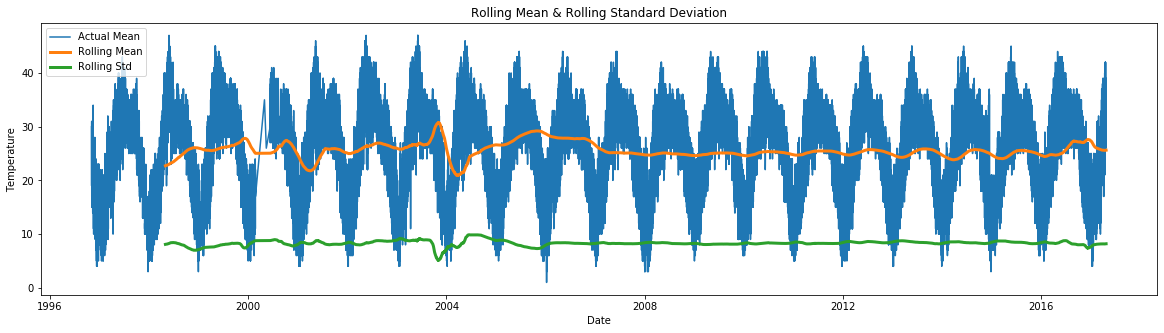

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-7.591821548961275, 2.519643033386066e-11, 68, 100084, {'1%': -3.430415339791845, '5%': -2.8615688791645866, '10%': -2.5667853713687143}, 419115.6523891019)
df_output: 
 Test Statistic                -7.591822e+00
p-value                        2.519643e-11
#Lags Used                     6.800000e+01
Number of Observations Used    1.000840e+05
dtype: float64
Test Statistic                -7.591822e+00
p-value                        2.519643e-11
#Lags Used                     6.800000e+01
Number of Observations Used    1.000840e+05
Critical Value (1%)           -3.430415e+00
Critical Value (5%)           -2.861569e+00
Critical Value (10%)          -2.566785e+00
dtype: float64


In [29]:
stationarity_check(df._tempm)

This Data is stationary.

# ARIMA Model

In [30]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


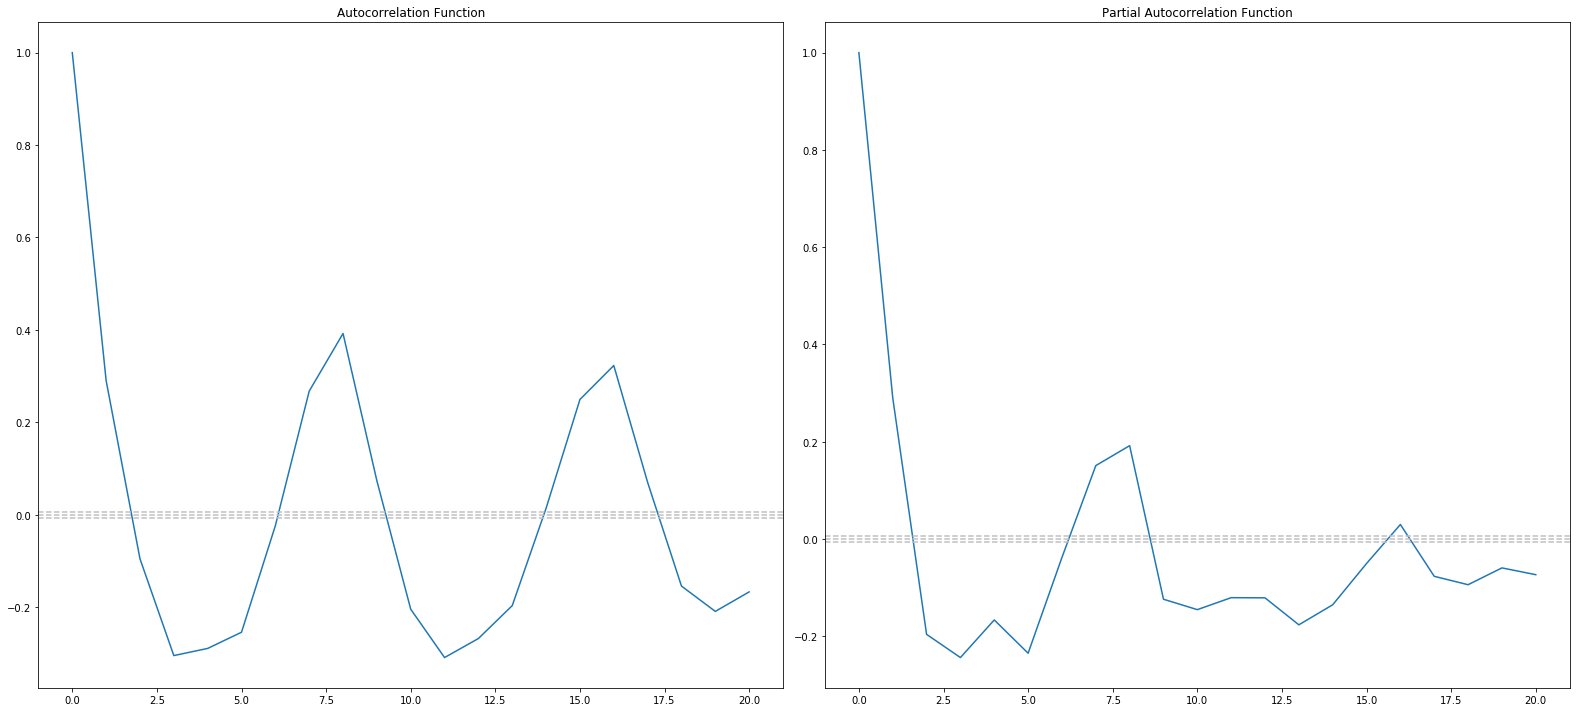

In [31]:
acf_lag = acf(df._tempm.diff().dropna().values, nlags=20)
pacf_lag = pacf(df._tempm.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(df._tempm.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(df._tempm.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(df._tempm.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(df._tempm.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [32]:
train_df = df._tempm['1996':'2015'].resample('M').mean().fillna(method='pad')
test_df=df._tempm['2016':'2017'].resample('M').mean().fillna(method='pad')

In [33]:
model = ARIMA(train_df.values, order=(2,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  230
Model:                     ARMA(2, 2)   Log Likelihood                -537.119
Method:                       css-mle   S.D. of innovations              2.439
Date:                Tue, 11 Feb 2020   AIC                           1086.238
Time:                        19:41:34   BIC                           1106.867
Sample:                             0   HQIC                          1094.559
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.0920      0.158    159.200      0.000      24.783      25.401
ar.L1.y        1.7317      0.000   4311.779      0.000       1.731       1.733
ar.L2.y       -1.0000        nan        nan        n

c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\parakh\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond

<Figure size 1584x720 with 0 Axes>

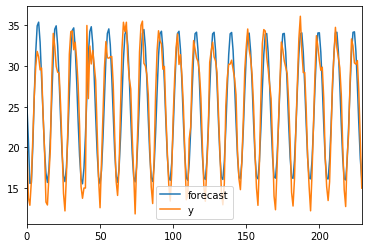

In [34]:
# Actual vs Fitted
plt.figure(figsize=(22,10))
model_fit.plot_predict(dynamic=False)
plt.show()

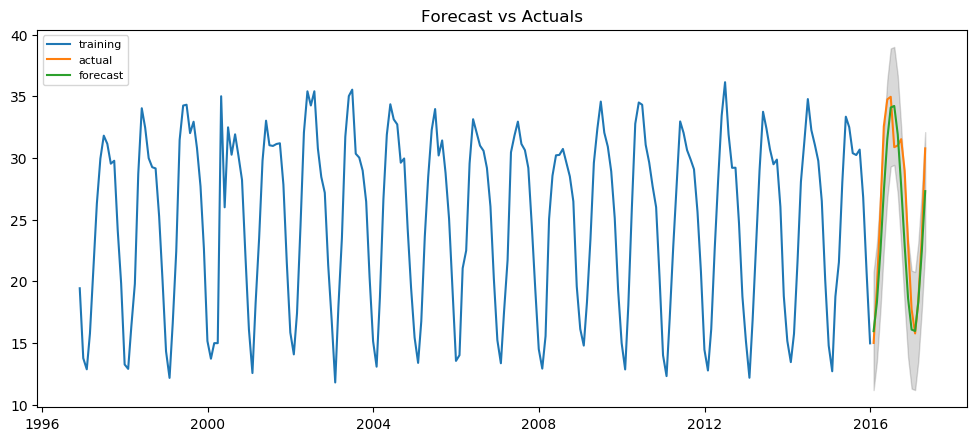

In [37]:
# # Forecast
fc, se, conf = model_fit.forecast(16, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()